# Using AWS Rekognition to recognise faces

### TODO : Set your bucket name here

In [11]:
bucket_name = 'applied-ai-20180924150202'
image_path = '../lfw'

### Imports

In [12]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('../') 

import random
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from utils import show_side_by_side, load_image_as_array
from aws_rekognition import train, test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an array of images from our dataset

Create 2 arrays, X and y, containing our training data.  In machine learning terminology, X is the data (in our case the file path for the images) and y is the labels. For this example, we'll use a mix of images of David Beckham and Serena Williams from the LFW dataset.

In [13]:
X = []
y = []
names = ['david_beckham', 'serena_williams']
for name in names:
    for image in os.listdir(os.path.join(image_path, name)):
        filename = os.path.join(image_path, name, image) 
        X.append(filename)
        y.append(name)
X = np.array(X)
y = np.array(y)

In [14]:
y

array(['david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham', 'david_beckham',
       'david_beckham', 'david_beckham', 'david_beckham',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena_williams', 'serena_williams',
       'serena_williams', 'serena

In [15]:
# def show_side_by_side(images:list, cmap:str='gray', figsize:tuple=None, labels:list=[])->None:
#     """Pass a list of images to display them side by side"""
#     fig, axes = plt.subplots(ncols=len(images), nrows=1)
    
#     if figsize:
#         fig.set_size_inches(*figsize)
        
#     for i, im in enumerate(images):
#         axes[i].imshow(im, cmap=cmap)
#         axes[i].set_xticks([])
#         axes[i].set_yticks([])
        
#     if len(labels) > 0:
#         for i, label in enumerate(labels):
#             axes[i].set_title(label)
    
#     plt.tight_layout()
    
# def load_image_as_array(path:str)->np.ndarray:
#     """Load image from disk into numpy array"""
#     img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
#     return img

def get_samples(X, y, num_samples=5):
    samples = [random.randint(0, len(X) - 1) for i in range(num_samples)]
    images = [load_image_as_array(image) for image in (X[samples])]
    labels = y[samples]
    return images, labels

### Let's look at a sample of the images
Create an index of 5 sample images to see what we have

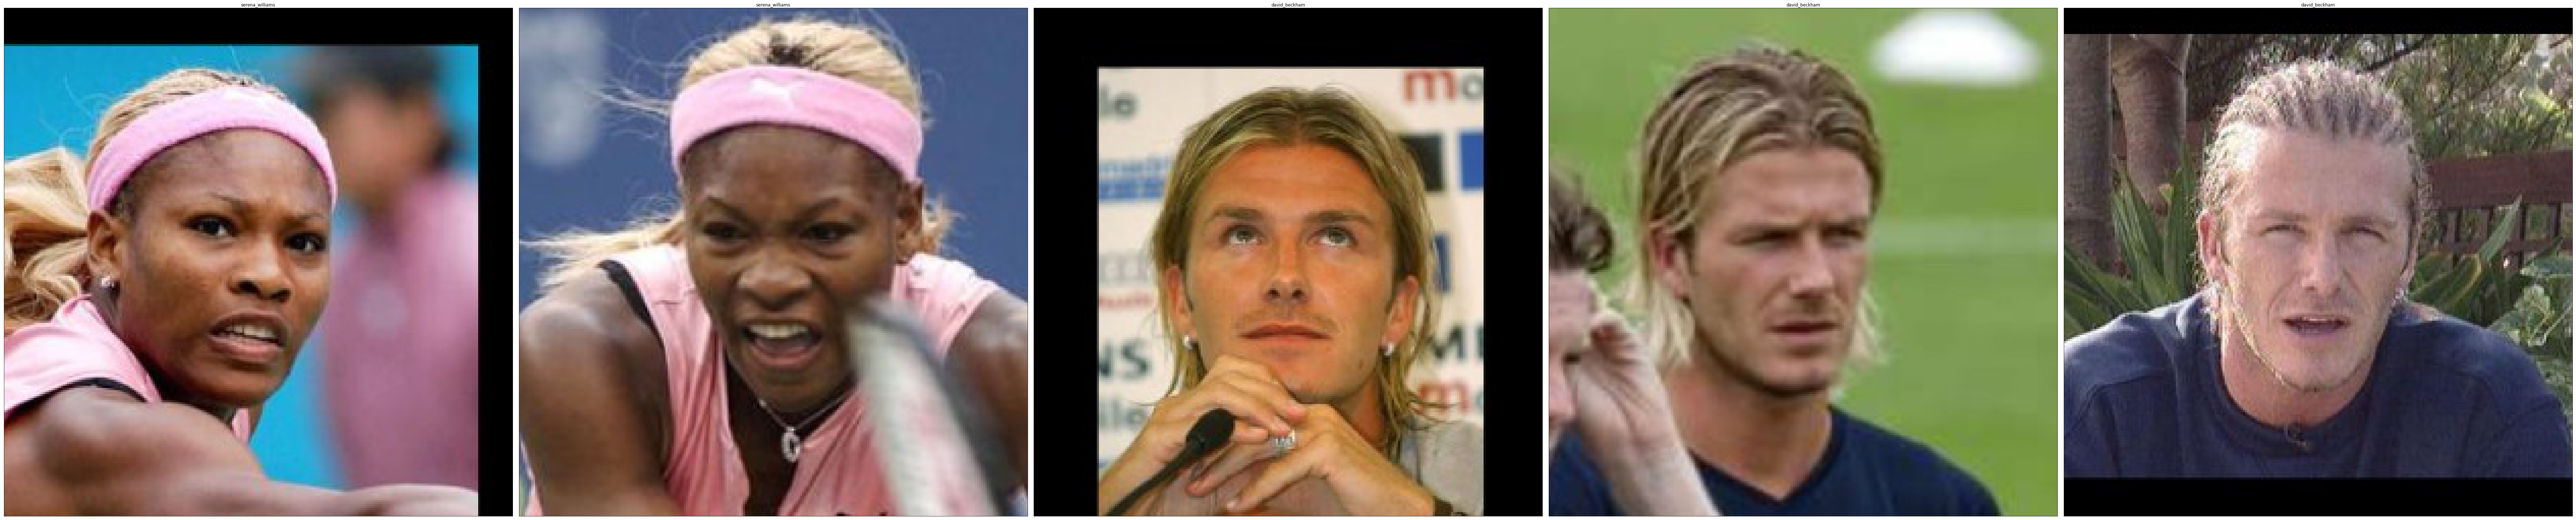

In [16]:
images, labels = get_samples(X, y)
show_side_by_side(images, figsize=(100,100), labels=labels) 

### Let's split our data into training and testing data

Obvioulsy, to do this properly we'd use more than just one person as this is going to overfit

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Let's view our train and testing data

In [18]:
[d for d in zip(X_train, y_train)]

[('../lfw/serena_williams/Serena_Williams_0024.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0047.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0004.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0010.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0041.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0015.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0003.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0013.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0027.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0014.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0051.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0006.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0010.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0040.jpg', 'serena_williams

In [19]:
[d for d in zip(X_test, y_test)]

[('../lfw/david_beckham/David_Beckham_0027.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0002.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0009.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0012.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0022.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0030.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0004.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0044.jpg', 'serena_williams'),
 ('../lfw/david_beckham/David_Beckham_0029.jpg', 'david_beckham'),
 ('../lfw/david_beckham/David_Beckham_0011.jpg', 'david_beckham'),
 ('../lfw/serena_williams/Serena_Williams_0016.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0007.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0018.jpg', 'serena_williams'),
 ('../lfw/serena_williams/Serena_Williams_0005.jpg', 'serena_williams'),
 ('../lfw/serena_williams/

### Now let's train Rekognition by copying our images to the S3 bucket

In [20]:
train(X_train, y_train, bucket_name)

../lfw/serena_williams/Serena_Williams_0024.jpg serena_williams
{'ResponseMetadata': {'RequestId': '36DBD41FCDF1B0C2', 'HostId': 'lhQuUTs9g9+7aFzk6mthtIvEoWJhdhXS9MIzDerXAYvwadmG7/brlSGuz2gKhUwiI1BdLSBar5c=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'lhQuUTs9g9+7aFzk6mthtIvEoWJhdhXS9MIzDerXAYvwadmG7/brlSGuz2gKhUwiI1BdLSBar5c=', 'x-amz-request-id': '36DBD41FCDF1B0C2', 'date': 'Wed, 26 Sep 2018 14:23:24 GMT', 'etag': '"5ab491f239ee5a9836e02fd8301a6895"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"5ab491f239ee5a9836e02fd8301a6895"'}
../lfw/serena_williams/Serena_Williams_0047.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'E154F7AA8263CD05', 'HostId': 'aW3JSk5TCbc6nBYUqY0WSpXQLCH40A4b3zpjcH2sdi8aMdC1DmyvVydU2QrrLrX1OJzJTcEL0Yw=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'aW3JSk5TCbc6nBYUqY0WSpXQLCH40A4b3zpjcH2sdi8aMdC1DmyvVydU2QrrLrX1OJzJTcEL0Yw=', 'x-amz-request-id': 'E154F7AA8263CD05', 'date': 'Wed, 26 Sep 2018 14:23:24 G

{'ResponseMetadata': {'RequestId': '47B7DD06F1457152', 'HostId': 'vOdtXD4XiDtAJ4lCN9gMSeCgQjCWVmISdyZj3dH21xm97XZOvgu+LOaH9fOB7V4d5wd0eujpHMc=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'vOdtXD4XiDtAJ4lCN9gMSeCgQjCWVmISdyZj3dH21xm97XZOvgu+LOaH9fOB7V4d5wd0eujpHMc=', 'x-amz-request-id': '47B7DD06F1457152', 'date': 'Wed, 26 Sep 2018 14:23:25 GMT', 'etag': '"cb4993d0c75429d0e2da6325a1a0b624"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"cb4993d0c75429d0e2da6325a1a0b624"'}
../lfw/david_beckham/David_Beckham_0014.jpg david_beckham
{'ResponseMetadata': {'RequestId': '40983D3810A27594', 'HostId': 'vHPsxJjbD4S/cdcBTJWN3TKScbquUl8hjzbMfXG+pJd2v4vn6rGqNwcqwshwFgyCbTIIS+uUYNk=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'vHPsxJjbD4S/cdcBTJWN3TKScbquUl8hjzbMfXG+pJd2v4vn6rGqNwcqwshwFgyCbTIIS+uUYNk=', 'x-amz-request-id': '40983D3810A27594', 'date': 'Wed, 26 Sep 2018 14:23:26 GMT', 'etag': '"2f8852b78f3aad35d9a56c1afcac1622"', 'content-length': '

{'ResponseMetadata': {'RequestId': '8E1D8021B36234EC', 'HostId': 'Bgztoagy20Z5Gak3Bb8zrD7z49WvDjbySOSFhEg+3qw+18d1oy4obPTA6bNP+Xuk1nYDXuDmb5Q=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'Bgztoagy20Z5Gak3Bb8zrD7z49WvDjbySOSFhEg+3qw+18d1oy4obPTA6bNP+Xuk1nYDXuDmb5Q=', 'x-amz-request-id': '8E1D8021B36234EC', 'date': 'Wed, 26 Sep 2018 14:23:28 GMT', 'etag': '"6c4c886b0510bf2e49e158e1e3f16a50"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"6c4c886b0510bf2e49e158e1e3f16a50"'}
../lfw/serena_williams/Serena_Williams_0011.jpg serena_williams
{'ResponseMetadata': {'RequestId': '2853089DC5B5B24F', 'HostId': 'ef8+mSDxnfurqStGqTBbs27bEtbYdi8+IIMt31pScEzpFisJiVjvhGxeRwsGVZ53T9mpJ1yK8Hk=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'ef8+mSDxnfurqStGqTBbs27bEtbYdi8+IIMt31pScEzpFisJiVjvhGxeRwsGVZ53T9mpJ1yK8Hk=', 'x-amz-request-id': '2853089DC5B5B24F', 'date': 'Wed, 26 Sep 2018 14:23:28 GMT', 'etag': '"bc6a27ab9d06849b966c98f95336278c"', 'content-leng

{'ResponseMetadata': {'RequestId': '97384065B31E251D', 'HostId': 'GETSK1C76/tkUxLo3jJH8yAkyB2C5fuaHSfTJhpl8B+yzkSxyl7ExqqizttFaEblFZIb18bt6XU=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'GETSK1C76/tkUxLo3jJH8yAkyB2C5fuaHSfTJhpl8B+yzkSxyl7ExqqizttFaEblFZIb18bt6XU=', 'x-amz-request-id': '97384065B31E251D', 'date': 'Wed, 26 Sep 2018 14:23:30 GMT', 'etag': '"fd15f72872781491ec07e5dbe78e0f2d"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"fd15f72872781491ec07e5dbe78e0f2d"'}
../lfw/serena_williams/Serena_Williams_0052.jpg serena_williams
{'ResponseMetadata': {'RequestId': 'C0DCB114E44DA558', 'HostId': 'ia9IZDwbmirGsm3w93+gsoQRnQdgX1i7fms8+WQarmdaBUEEIa8Eld7n/3ic3k7cbEU59R51Pnk=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'ia9IZDwbmirGsm3w93+gsoQRnQdgX1i7fms8+WQarmdaBUEEIa8Eld7n/3ic3k7cbEU59R51Pnk=', 'x-amz-request-id': 'C0DCB114E44DA558', 'date': 'Wed, 26 Sep 2018 14:23:30 GMT', 'etag': '"4371b75da1c7b3421b4e96bf45a15836"', 'content-leng

{'ResponseMetadata': {'RequestId': '918E056523C328D0', 'HostId': 'NWGXRG5I0TxZci/QyPLxYc5flmjMDqM6aLEmNTzs0xawiEP1yJmA4n2fC55962veb1nXLlBphYU=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'NWGXRG5I0TxZci/QyPLxYc5flmjMDqM6aLEmNTzs0xawiEP1yJmA4n2fC55962veb1nXLlBphYU=', 'x-amz-request-id': '918E056523C328D0', 'date': 'Wed, 26 Sep 2018 14:23:32 GMT', 'etag': '"8a225c851dd9c0e3152292c5ad46e0dd"', 'content-length': '0', 'server': 'AmazonS3'}, 'RetryAttempts': 0}, 'ETag': '"8a225c851dd9c0e3152292c5ad46e0dd"'}
../lfw/david_beckham/David_Beckham_0020.jpg david_beckham
{'ResponseMetadata': {'RequestId': 'DBDFF54F206A950C', 'HostId': 'q88bl9iC69t1kZsqfvqpQIdtZtcKkk8D9S5+EgooAtC/M124KBoPOKM6GcF33/hmHUGvV8ifZo8=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'q88bl9iC69t1kZsqfvqpQIdtZtcKkk8D9S5+EgooAtC/M124KBoPOKM6GcF33/hmHUGvV8ifZo8=', 'x-amz-request-id': 'DBDFF54F206A950C', 'date': 'Wed, 26 Sep 2018 14:23:32 GMT', 'etag': '"b4c5c030736d1ce1c978764e04504b1d"', 'content-length': '

### Now let's test Rekognition to see how accurate it is
We'll use our test dataset for this

In [21]:
images, labels = get_samples(np.array(X_test), np.array(y_test))

In [22]:
def show_image(image):
    img = image.squeeze()
    plt.axis("off")
    plt.imshow(img, cmap='gray', interpolation='nearest')  # Manipulation to display image in the correct orientation!
    plt.show() 

Testing image ../lfw/david_beckham/David_Beckham_0027.jpg


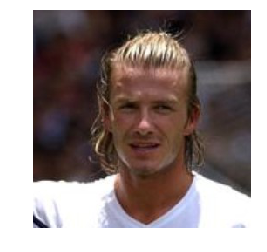

testing image ../lfw/david_beckham/David_Beckham_0027.jpg
Called rekognition...
ad44f0a3-1849-4108-be31-928bd63aa86a 99.99669647216797
07a4049f-617f-4267-933b-5eea29919970 99.9988021850586
56229a3b-46db-4858-881b-16261ba3f927 99.99930572509766
9e038875-510e-490e-aaea-c1bcbd1d5256 99.99979400634766
8bd45ee7-4dca-4a64-b8fc-6beb9a82abb5 99.99700164794922
3e6a24ea-afed-4d04-81c5-bb002bead3f6 99.997802734375
2112da60-c035-404a-a4ea-f48076fa5b75 99.99510192871094
0a4e66b8-091c-4a9f-bac5-57fb093687db 99.99309539794922
2323cba7-80bb-42ef-90a9-094f6c660ff7 99.99919891357422
14857044-bfaa-4e1d-9ade-0458120446a1 99.9999008178711
22487a00-c084-4e8a-b95e-ea0bbfb65630 99.98619842529297
601ff58c-f91e-43e7-8f04-399eb7a8aa08 99.99330139160156
13da4872-ad92-4f60-a33a-62da5c2215f2 99.96900177001953
a18d7381-3cb3-4578-b692-af016ccd63f4 99.99679565429688
73c13279-2455-45c3-8041-979a89674862 99.99420166015625
d84c499b-4862-44d5-bfa2-e15e988a4384 99.99440002441406
ebf6b52a-e772-4bbe-8bbb-c28fd962344d 99.9997

In [26]:
for image, label in zip(X_test, y_test):
    print('Testing image {}'.format(image))
    img = load_image_as_array(image)
    show_image(img) 
    inferred = test(image)
    print(inferred)
    break